In [1]:
import pandas as pd
import numpy as np
import igraph
from igraph import *

In [9]:
# Transition probability
A = np.array( #backbone, branch, leaf
              [[0.58, 0.4, 0.02],  #backbone
               [0.0, 0.6,  0.4 ]]) #branch 

# active nodes
active_backbone = [0,1]
active_branch = []
active_leaf = []

# Initialize graph
vineg = Graph()
vineg.add_vertices([0,1])
vineg.add_edges([[0,1]])
# backbone: black, branch: brown, leaf: green
VertexColor= ["Black","Black"]

In [10]:
count=1
#for it in range(1000):
while True:
    if len(active_backbone)>0:
        for bb in active_backbone:
            rnum = np.random.random_sample()
            if (rnum < A[0,0]):
                count = count+1
                active_backbone.remove(bb)
                active_backbone.append(count)
                vineg.add_vertices([count])
                vineg.add_edges([[bb,count]])
                VertexColor.append("Black")
            elif (rnum < A[0,1]+A[0,0]):
                count = count+1
                active_branch.append(count)
                vineg.add_vertices([count])
                vineg.add_edges([[bb,count]])
                VertexColor.append("Brown")
            else:
                count = count+1
                active_backbone.remove(bb)
                active_leaf.append(count)
                vineg.add_vertices([count])
                vineg.add_edges([[bb,count]])
                VertexColor.append("Green")
     
    if len(active_branch)>0:
        for br in active_branch:
            rnum = np.random.random_sample()
            if (rnum < A[1,1]):
                count = count+1
                active_branch.remove(br)
                active_branch.append(count)
                vineg.add_vertices([count])
                vineg.add_edges([[br,count]])
                VertexColor.append("Brown")
            else:
                count = count+1
                active_branch.remove(br)
                active_leaf.append(count)
                vineg.add_vertices([count])
                vineg.add_edges([[br,count]])
                VertexColor.append("Green")
    
    if len(active_branch)==0 and len(active_backbone)==0:
        break

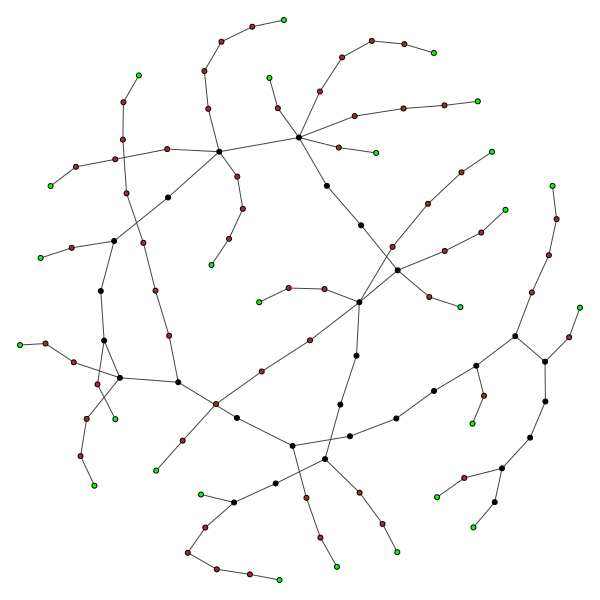

In [12]:
#layout = min_span_tree.layout("reingold_tilford_circular")
#layout = min_span_tree.layout("reingold_tilford")
#layout = min_span_tree.layout("fruchterman_reingold")
plot(vineg, vertex_size=5,vertex_color=VertexColor)